In [249]:
import numpy as np   
import pandas as pd  
import seaborn as sns
import sklearn.metrics
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression #,RandomForest
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder

## Load dataset

In [252]:
data=pd.read_csv("C:\\Users\\Lenovo\\Downloads\\WA_Fn-UseC_-Telco-Customer-Churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [257]:
df=data.copy()
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Summarize the data

In [13]:
df.shape

(7043, 21)

#### This dataset have 7043 rows and 21 features/columns

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
# convert the categorical column "TotalCharges" to Numerical
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors="coerce")


# Exploring datatypes of each features
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Checking Missing/null values

In [18]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [19]:
df["TotalCharges"]=df["TotalCharges"].fillna(df["tenure"]*df["MonthlyCharges"])

### Again check null values

In [21]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Renaming some columns 

In [23]:
df.rename(columns={'gender':'Gender', 
                   'customerID':'CustomerID', 
                   'Contract':'ContractType', 
                   'InternetService':'InternetServiceType', 
                   'tenure':'Tenure'},inplace=True)

### Categorical,Numerical,Target columns 

In [25]:
cat_cols=["Gender","Partner","Dependents","SeniorCitizen","PhoneService","MultipleLines", 
          "InternetServiceType","OnlineSecurity","OnlineBackup","DeviceProtection", 
          "TechSupport","StreamingTV","StreamingMovies","ContractType", 
          "PaperlessBilling","PaymentMethod"]
num_cols=["Tenure","MonthlyCharges","TotalCharges"]

target_col=['Churn']

### Descriptive statistics for Categorical columns

In [27]:
df[cat_cols].describe(include='all')

,Gender,Partner,Dependents,SeniorCitizen,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,ContractType,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,3555,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365
mean,NaN,NaN,NaN,0.162147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,0.368612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Descriptive statistics for Numerical columns

In [29]:
df[num_cols].describe()

,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


#### Based on numerical columns analysis, 
#### * Average tenure of subscriber is 32 months. 
#### * Average monthly charges of subscriber is 64 dollars. 
#### * Average totalcharges of subscriber is 2279 dollars.

## Checking duplicates

In [32]:
df.duplicated().sum()

0

## Checking Outliers

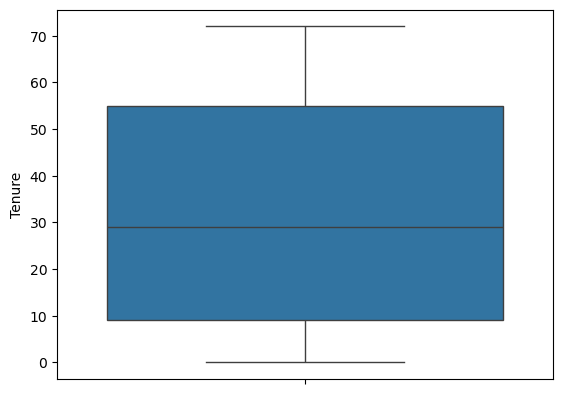

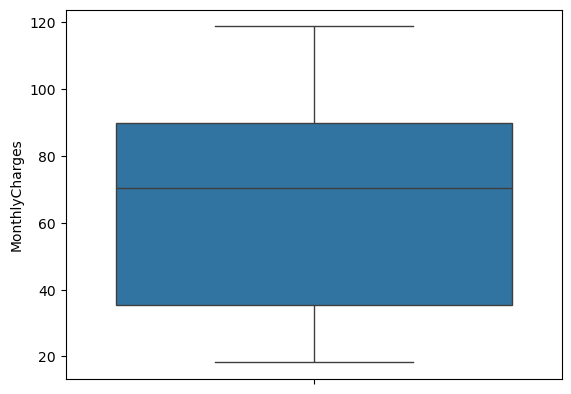

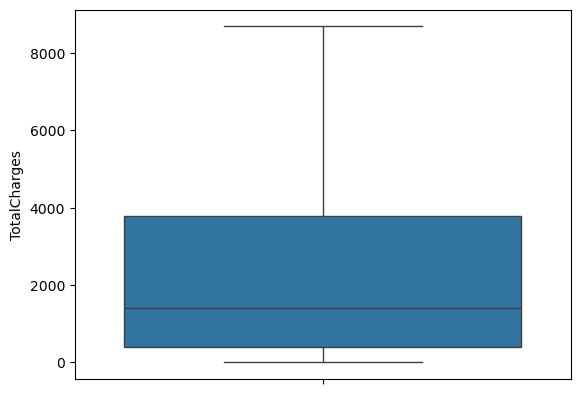

In [34]:
for col in num_cols: 
    sns.boxplot(df[col]) 
    plt.show() 
    

No outlier has been detected for the numerical values

## Exploratory data analysis(EDA)

### Univariate Analysis of Numerical columns 

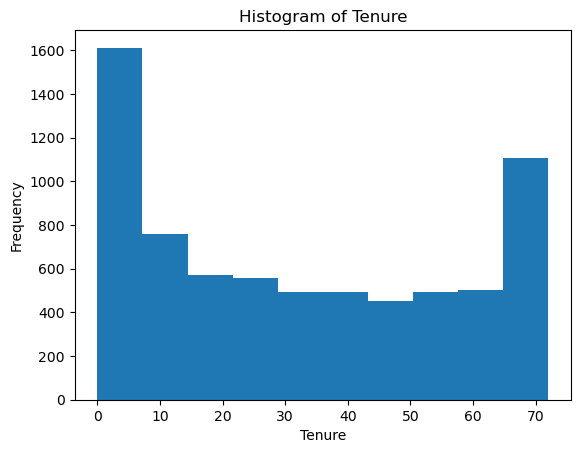

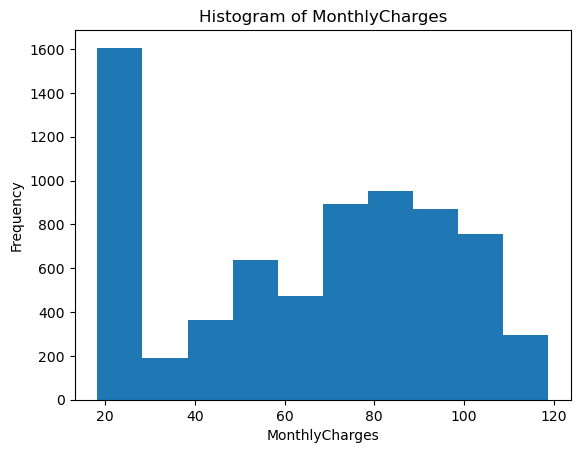

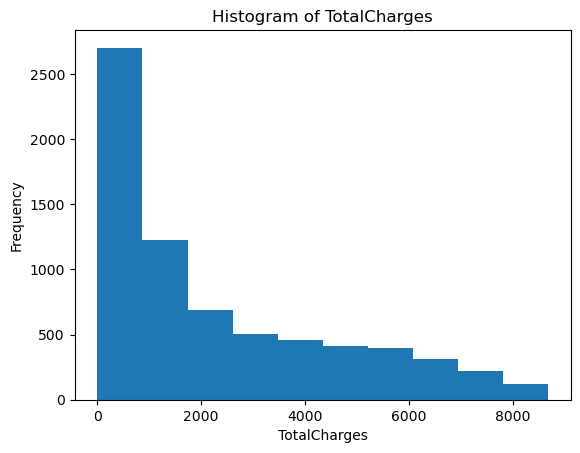

In [38]:
for col in num_cols:
    
    plt.hist(df[col]) 
    plt.title(f"Histogram of {col}") 
    plt.xlabel(col) 
    plt.ylabel("Frequency") 
    plt.show()

# distribution of the tenure have multiple peaks at different intervels
# distribution of the monthly charges most of the customers having lower to mid range and few customers in the higher range. 
# distribution of totalcharges is right skewed distribution ,many customers have low total charges


## Correlation Between Numerical Values

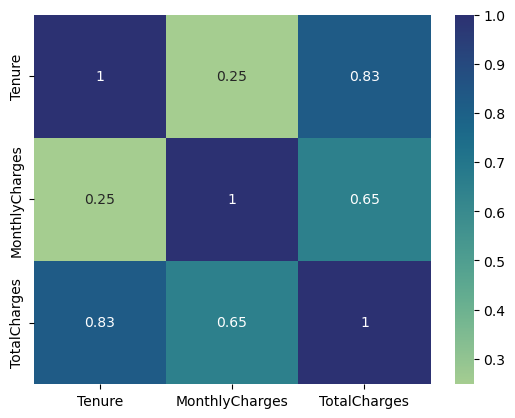

In [40]:
sns.heatmap(df[num_cols].corr(),annot=True,cmap='crest')
plt.show()

### Univariate Analysis of categorical columns 

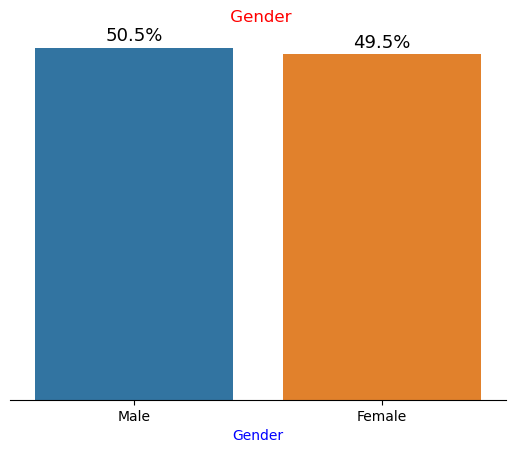

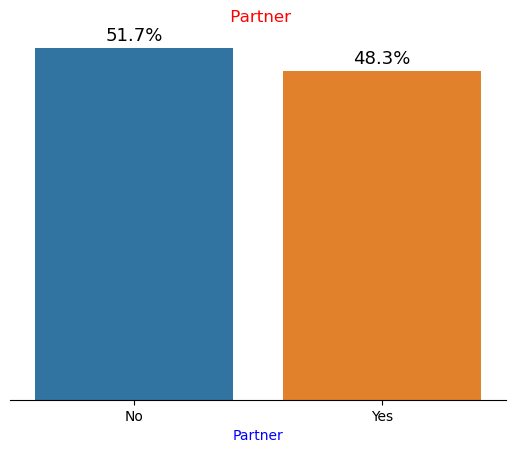

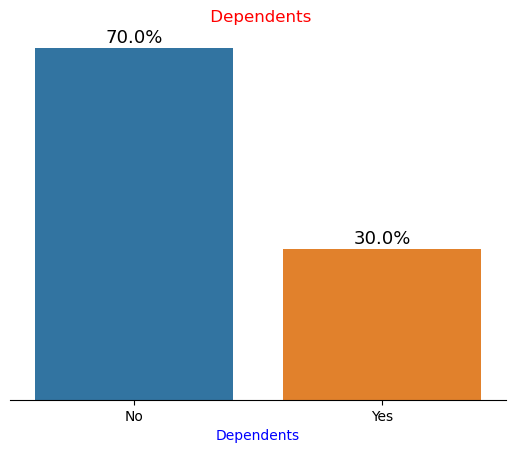

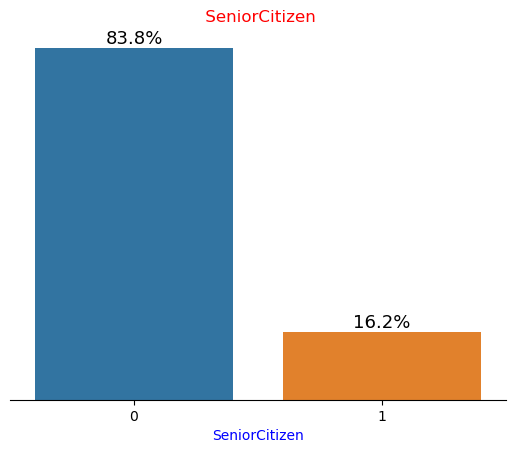

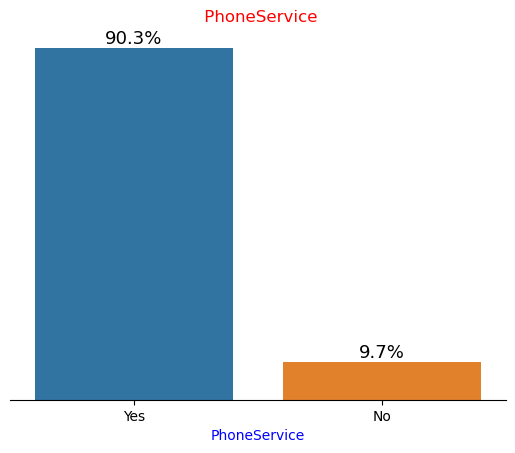

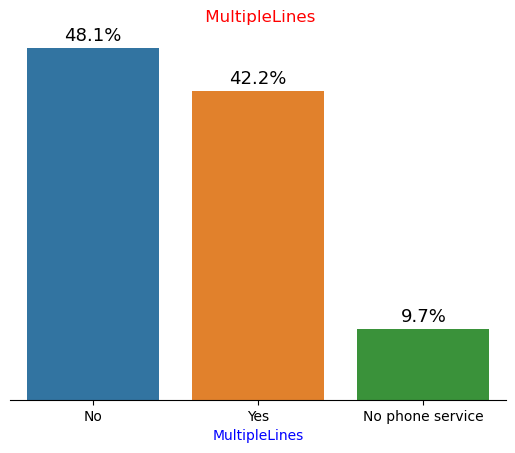

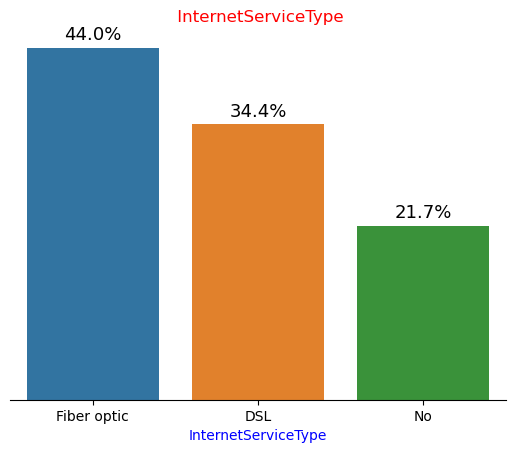

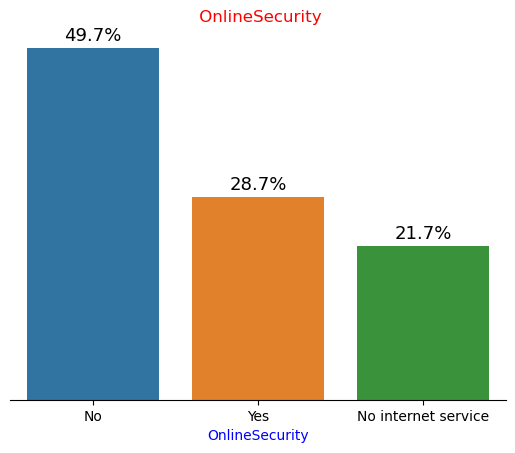

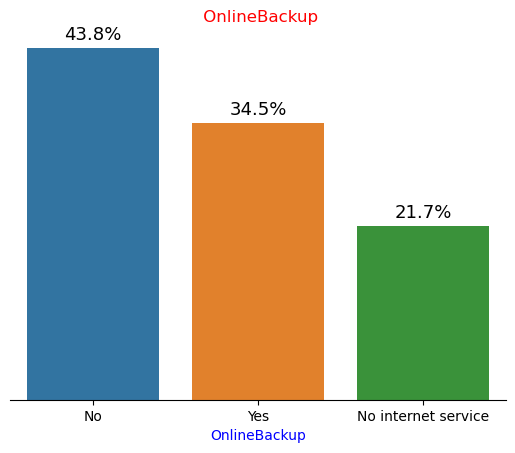

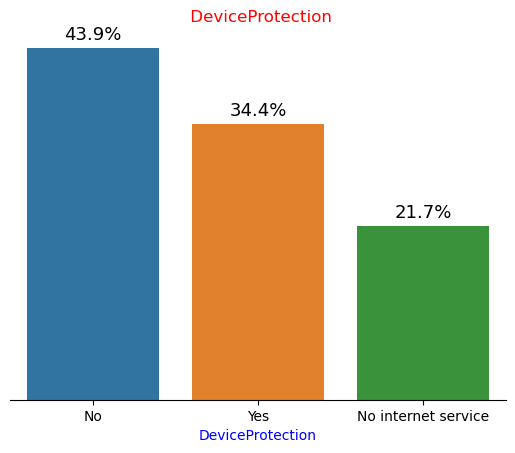

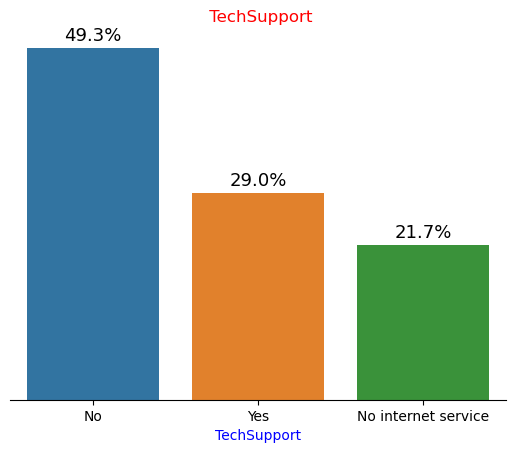

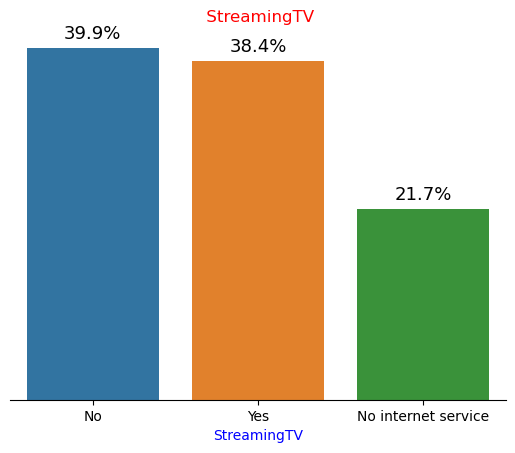

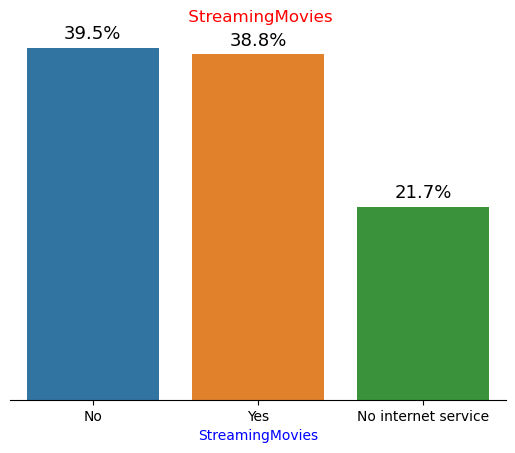

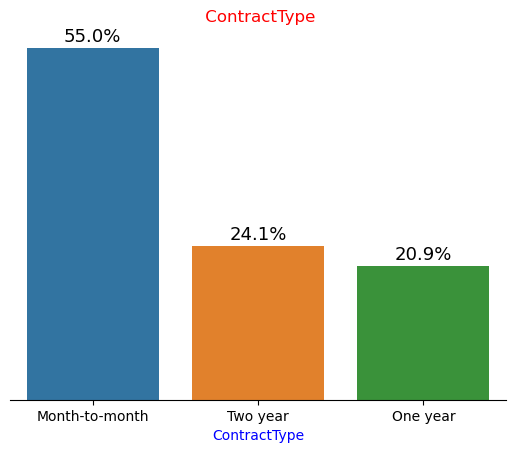

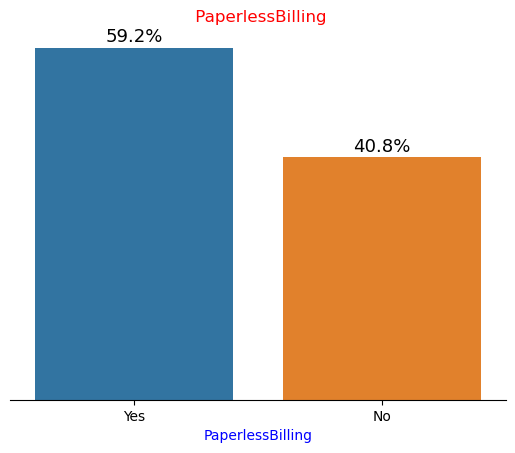

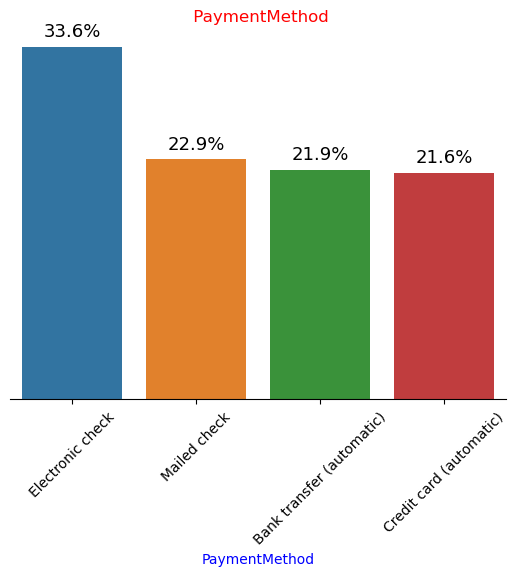

In [42]:
for col in cat_cols:
        rate=df[col].value_counts()/df.shape[0]*100
       # plt.figure(figsize=(8,6))
        sns.barplot(x=rate.index,y=rate.values,hue=rate.index,legend=False) 
        plt.title(f" {col}",color="r") 
        plt.xlabel(col,color="b") 
        plt.xticks(range(0,len(rate.index),1))
        # plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
        plt.ylabel("Frequency",color="b")
        plt.gca().axes.get_yaxis().set_visible(False)
       
    
        for spine in plt.gca().spines.values():
             spine.set_visible(False) if spine.spine_type != 'bottom' else spine.set_visible(True)
    
        for i,v in (enumerate(rate)):
            plt.text(i
                ,v+1
                ,f"{v:.1f}%"
                ,fontsize=13
                ,ha='center')
        if col=="PaymentMethod":
            plt.xticks(rotation=45)
        plt.show()


### Bivariate analysis (Categorical features vs churn)

In [44]:
churn_summary = df.groupby('Churn')

In [45]:
def data_labels(ax):
    for bar in ax.patches:
        ax.text(bar.get_x()+bar.get_width()/2,bar.get_height()+0.01,str(round(bar.get_height()*100,2))+'%',ha='center')

In [46]:
def categorical_vs_churn_dist(feature,filterFea=''):
    color=["blue","green"]
    if filterFea != '':
        feature_summary = df[df[filterFea]==1].groupby('Churn')[feature].value_counts(normalize=True).reset_index(name='Percentage')
        print(feature," summary: \n ", feature_summary)
        sns.catplot(hue=feature,
                    y='Percentage',
                    data = feature_summary,
                    col='Churn',
                    kind='bar',
                    alpha = 0.6)
        plt.xticks(rotation=45)
        plt.ylim(top=1)

    else:
        feature_summary = churn_summary[feature].value_counts(normalize=True).reset_index(name='Percentage')
        print(feature," summary: \n ", feature_summary)
        plt_cat=sns.catplot(x=feature,
                    y='Percentage',
                    data = feature_summary,
                    col='Churn',
                    kind='bar',
                    hue=feature,
                    palette="hls",
                    alpha = 0.5)
        plt.ylim(top=1)
    for i,v in enumerate(feature):
        for ax1,ax2 in plt_cat.axes:
            data_labels(ax1)
            data_labels(ax2)
            
    if feature=="PaymentMethod":
            plt_cat.set_xticklabels(rotation=45)

        
    return plt.show()

Partner  summary: 
    Churn Partner  Percentage
0    No     Yes    0.528218
1    No      No    0.471782
2   Yes      No    0.642055
3   Yes     Yes    0.357945


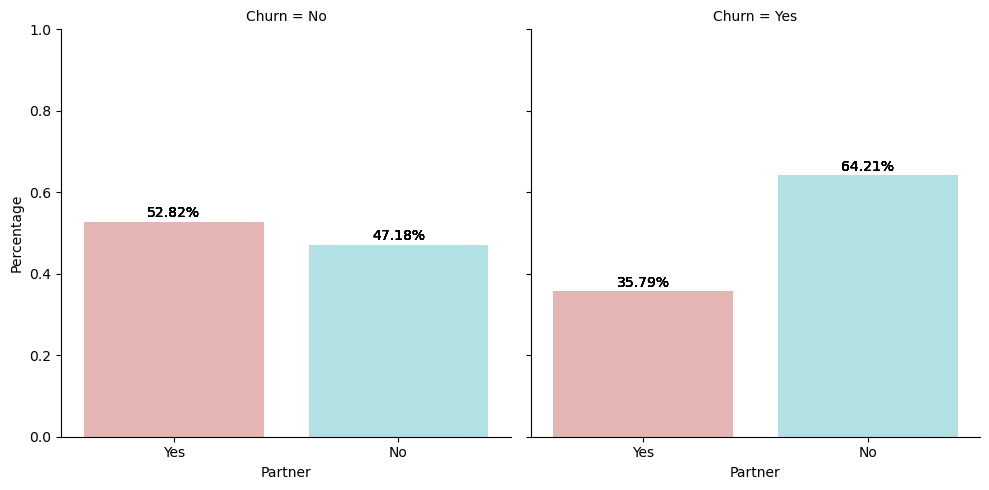

In [47]:
categorical_vs_churn_dist('Partner')

Dependents  summary: 
    Churn Dependents  Percentage
0    No         No    0.655199
1    No        Yes    0.344801
2   Yes         No    0.825575
3   Yes        Yes    0.174425


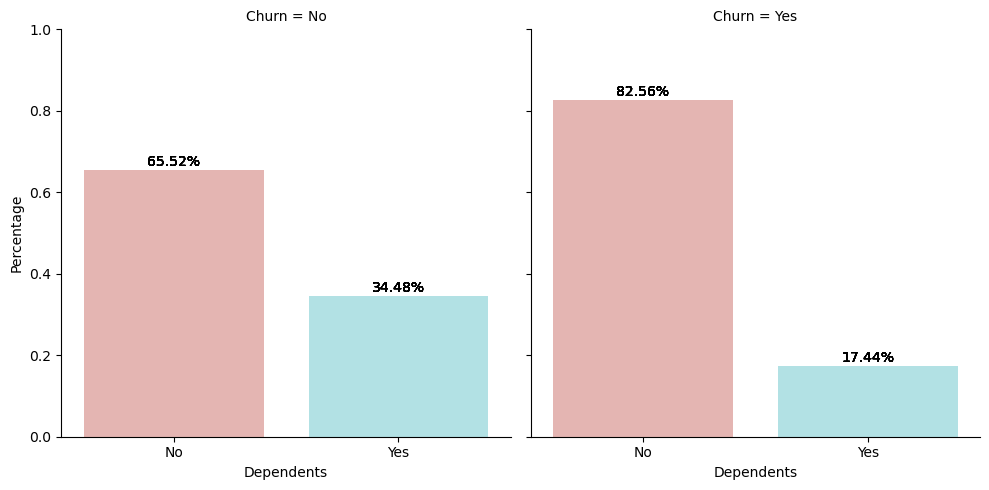

In [48]:
categorical_vs_churn_dist('Dependents')

* People who have churned are likely to have no partners or independent

SeniorCitizen  summary: 
    Churn  SeniorCitizen  Percentage
0    No              0    0.871279
1    No              1    0.128721
2   Yes              0    0.745318
3   Yes              1    0.254682


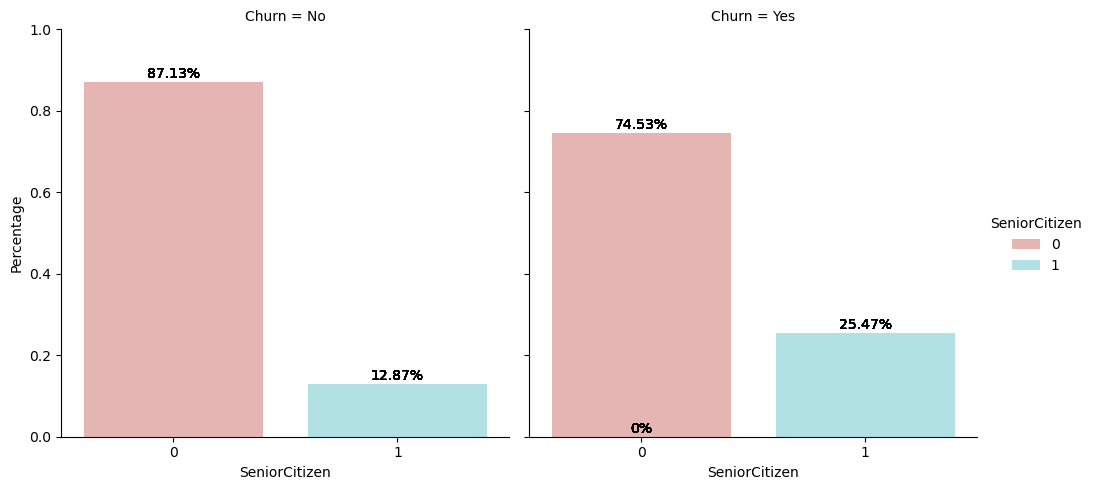

In [50]:
categorical_vs_churn_dist('SeniorCitizen')

* Compared to existing Senior citizen customers, the percentage of senior citizens have churned is more.

PhoneService  summary: 
    Churn PhoneService  Percentage
0    No          Yes    0.901044
1    No           No    0.098956
2   Yes          Yes    0.909042
3   Yes           No    0.090958


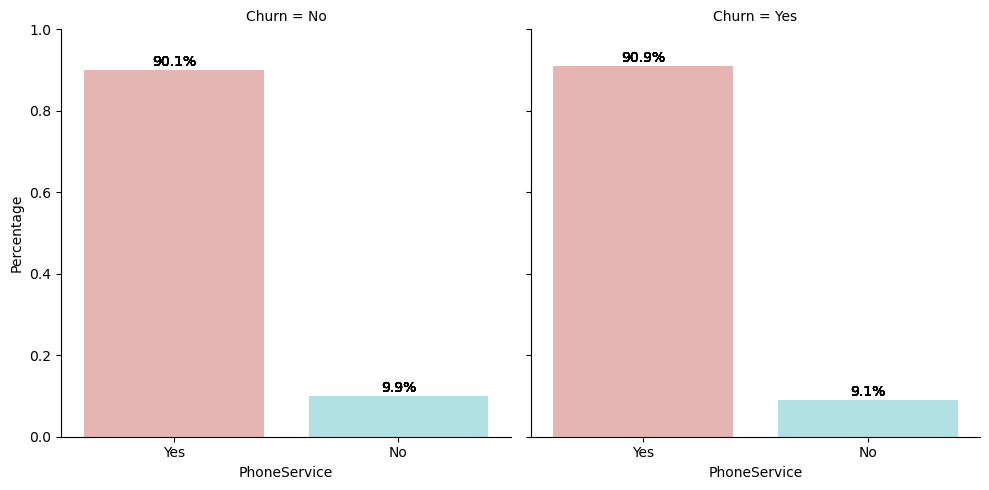

In [52]:
categorical_vs_churn_dist('PhoneService')

* 

MultipleLines  summary: 
    Churn     MultipleLines  Percentage
0    No                No    0.491109
1    No               Yes    0.409934
2    No  No phone service    0.098956
3   Yes               Yes    0.454789
4   Yes                No    0.454254
5   Yes  No phone service    0.090958


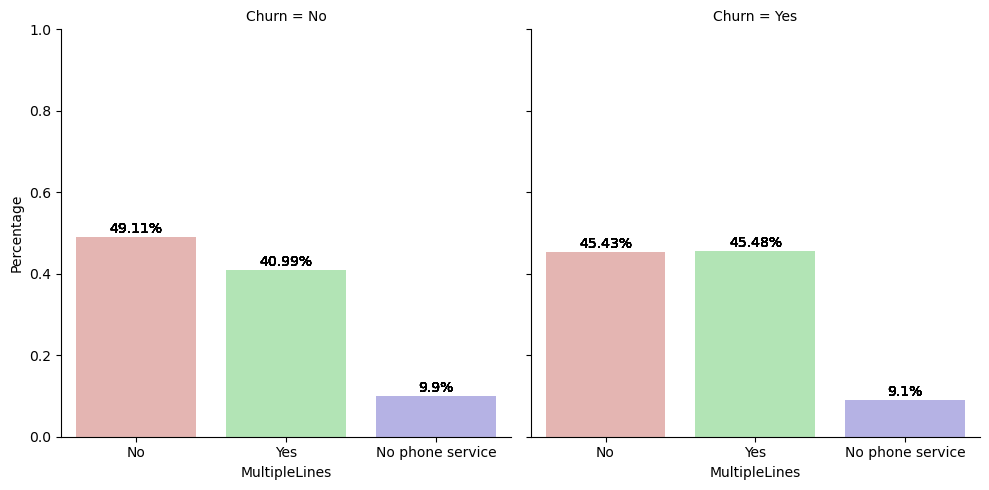

In [54]:
categorical_vs_churn_dist('MultipleLines')

InternetServiceType  summary: 
    Churn InternetServiceType  Percentage
0    No                 DSL    0.379204
1    No         Fiber optic    0.347700
2    No                  No    0.273096
3   Yes         Fiber optic    0.693954
4   Yes                 DSL    0.245586
5   Yes                  No    0.060460


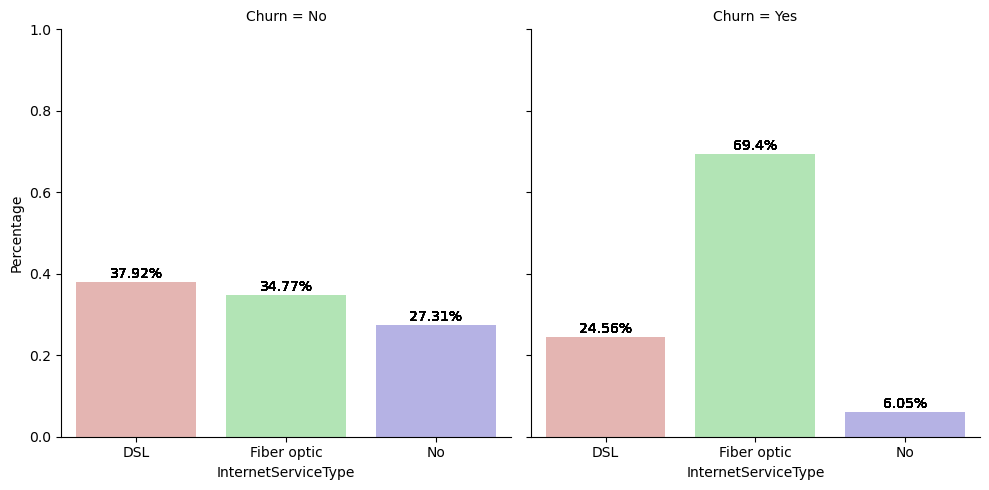

In [55]:
categorical_vs_churn_dist('InternetServiceType')

OnlineSecurity  summary: 
    Churn       OnlineSecurity  Percentage
0    No                   No    0.393699
1    No                  Yes    0.333204
2    No  No internet service    0.273096
3   Yes                   No    0.781701
4   Yes                  Yes    0.157838
5   Yes  No internet service    0.060460


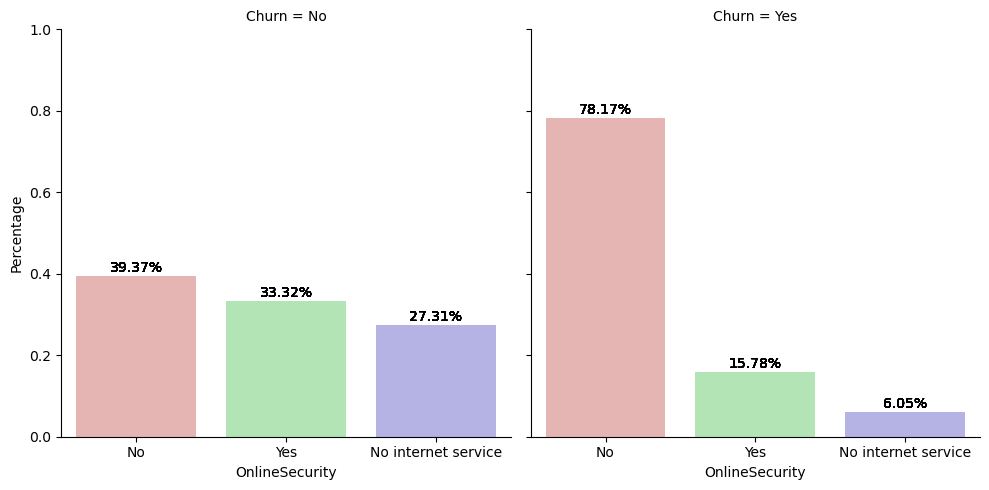

In [56]:
categorical_vs_churn_dist('OnlineSecurity')

OnlineBackup  summary: 
    Churn         OnlineBackup  Percentage
0    No                  Yes    0.368380
1    No                   No    0.358523
2    No  No internet service    0.273096
3   Yes                   No    0.659711
4   Yes                  Yes    0.279829
5   Yes  No internet service    0.060460


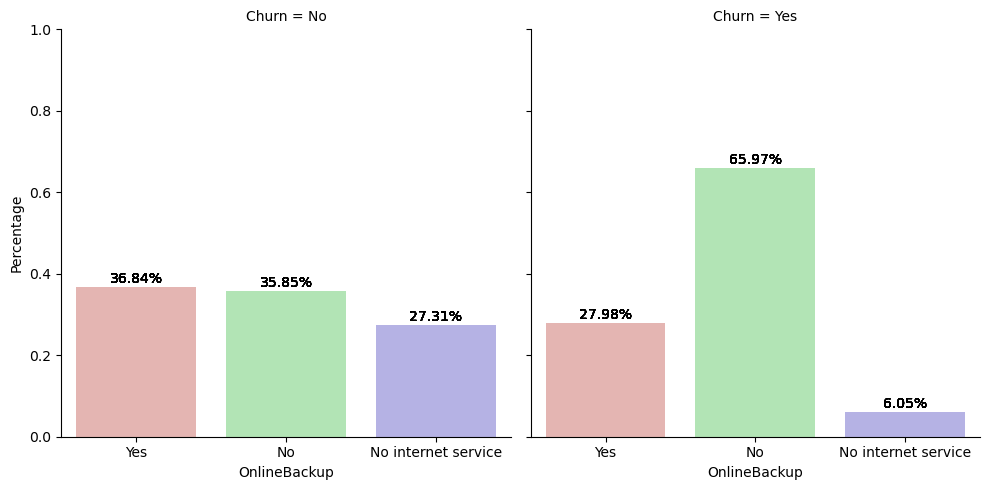

In [57]:
categorical_vs_churn_dist('OnlineBackup')

DeviceProtection  summary: 
    Churn     DeviceProtection  Percentage
0    No                   No    0.364128
1    No                  Yes    0.362775
2    No  No internet service    0.273096
3   Yes                   No    0.647940
4   Yes                  Yes    0.291600
5   Yes  No internet service    0.060460


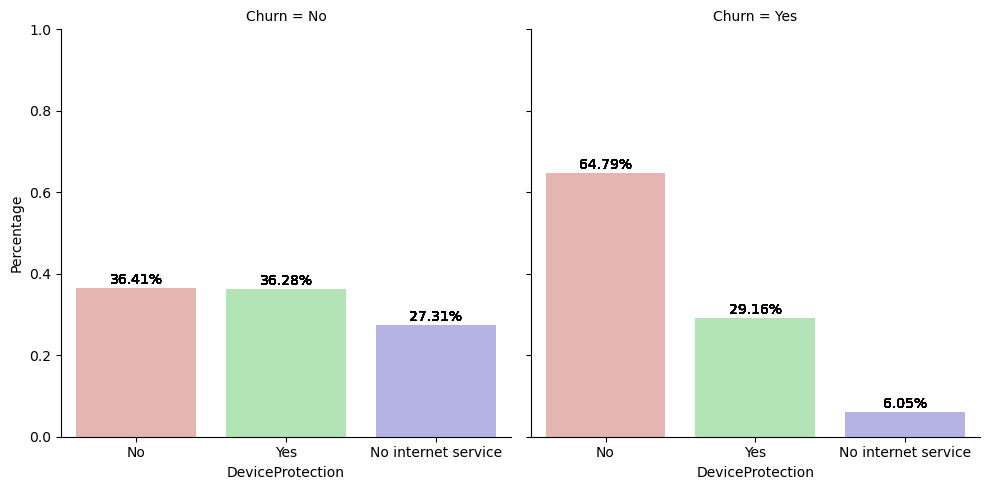

In [58]:
categorical_vs_churn_dist('DeviceProtection')

TechSupport  summary: 
    Churn          TechSupport  Percentage
0    No                   No    0.391767
1    No                  Yes    0.335137
2    No  No internet service    0.273096
3   Yes                   No    0.773676
4   Yes                  Yes    0.165864
5   Yes  No internet service    0.060460


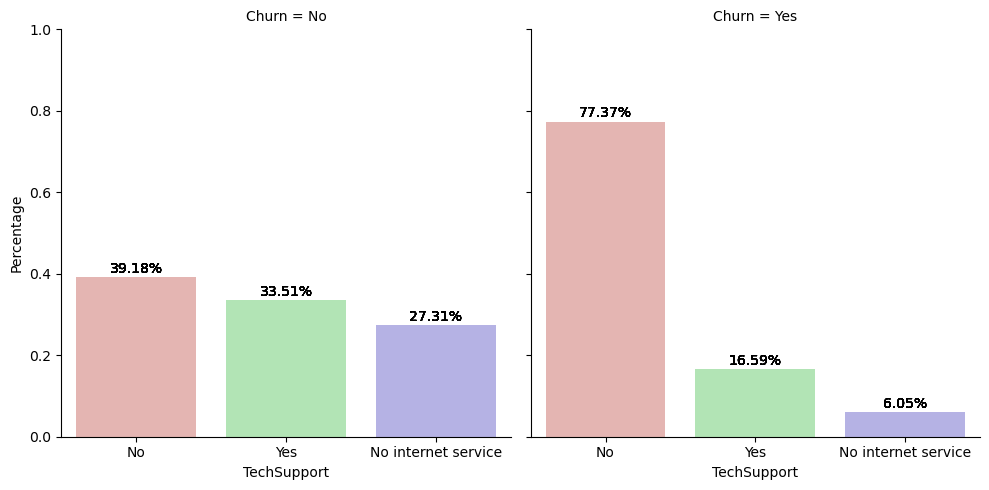

In [59]:
categorical_vs_churn_dist('TechSupport')

StreamingTV  summary: 
    Churn          StreamingTV  Percentage
0    No                  Yes    0.365868
1    No                   No    0.361036
2    No  No internet service    0.273096
3   Yes                   No    0.504013
4   Yes                  Yes    0.435527
5   Yes  No internet service    0.060460


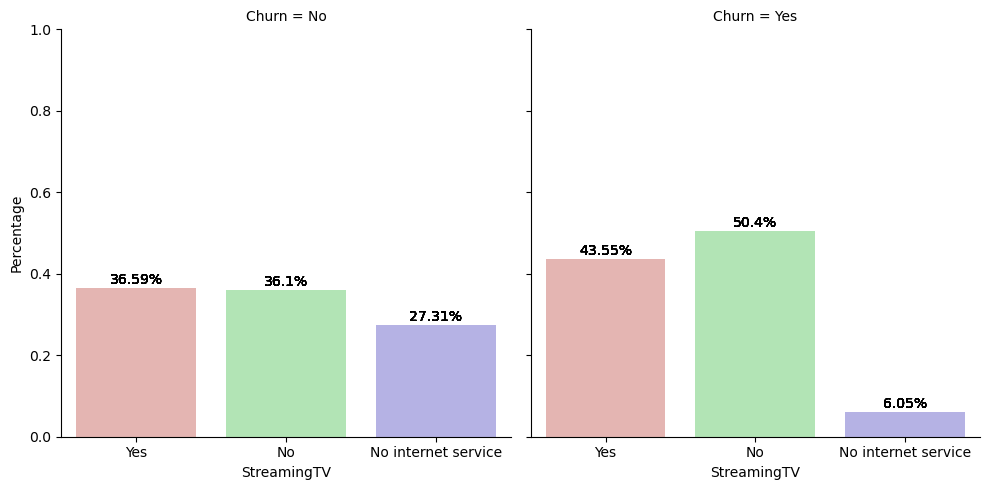

In [60]:
categorical_vs_churn_dist('StreamingTV')

StreamingMovies  summary: 
    Churn      StreamingMovies  Percentage
0    No                  Yes    0.369927
1    No                   No    0.356977
2    No  No internet service    0.273096
3   Yes                   No    0.501873
4   Yes                  Yes    0.437667
5   Yes  No internet service    0.060460


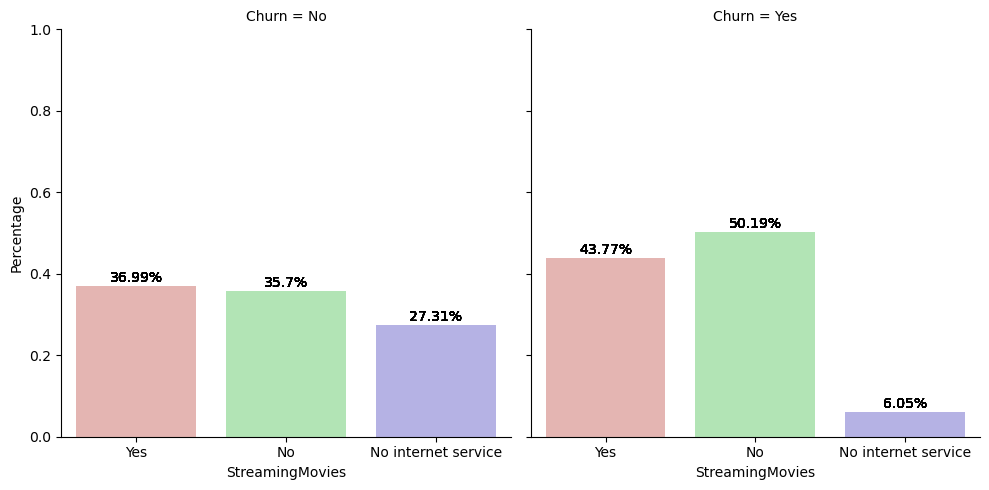

In [61]:
categorical_vs_churn_dist('StreamingMovies')

ContractType  summary: 
    Churn    ContractType  Percentage
0    No  Month-to-month    0.429068
1    No        Two year    0.318322
2    No        One year    0.252609
3   Yes  Month-to-month    0.885500
4   Yes        One year    0.088818
5   Yes        Two year    0.025682


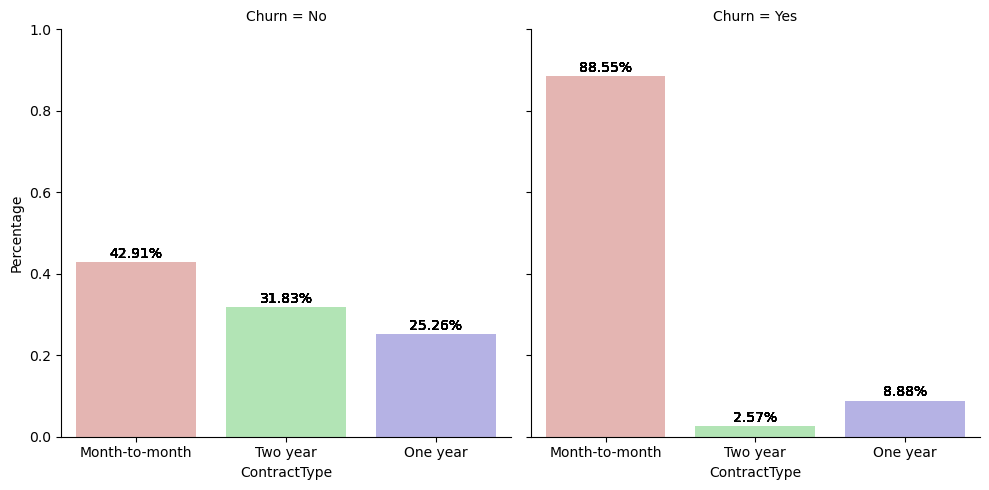

In [62]:
categorical_vs_churn_dist('ContractType')

* customers having month to month subscription are more likely to churn because of no contract.

PaperlessBilling  summary: 
    Churn PaperlessBilling  Percentage
0    No              Yes    0.535562
1    No               No    0.464438
2   Yes              Yes    0.749064
3   Yes               No    0.250936


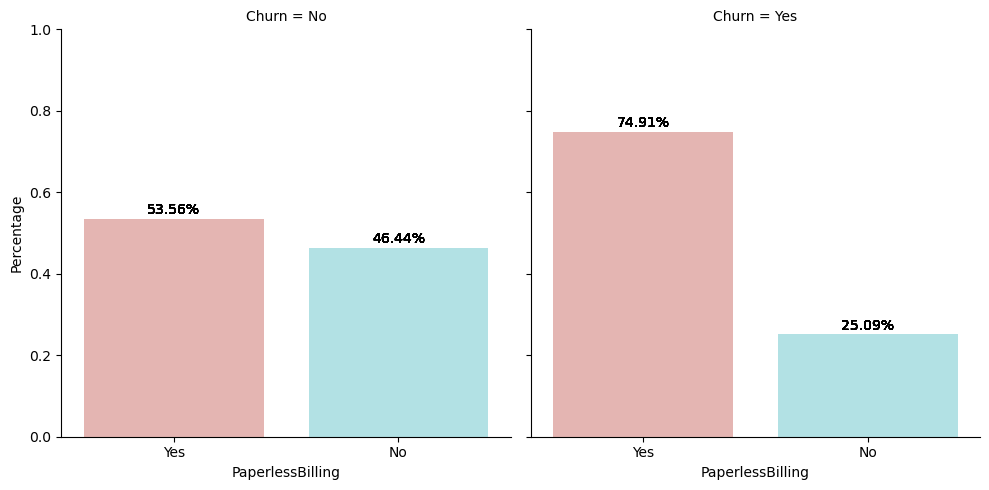

In [64]:
categorical_vs_churn_dist('PaperlessBilling')

PaymentMethod  summary: 
    Churn              PaymentMethod  Percentage
0    No               Mailed check    0.252029
1    No           Electronic check    0.250097
2    No    Credit card (automatic)    0.249324
3    No  Bank transfer (automatic)    0.248550
4   Yes           Electronic check    0.573034
5   Yes               Mailed check    0.164794
6   Yes  Bank transfer (automatic)    0.138042
7   Yes    Credit card (automatic)    0.124131


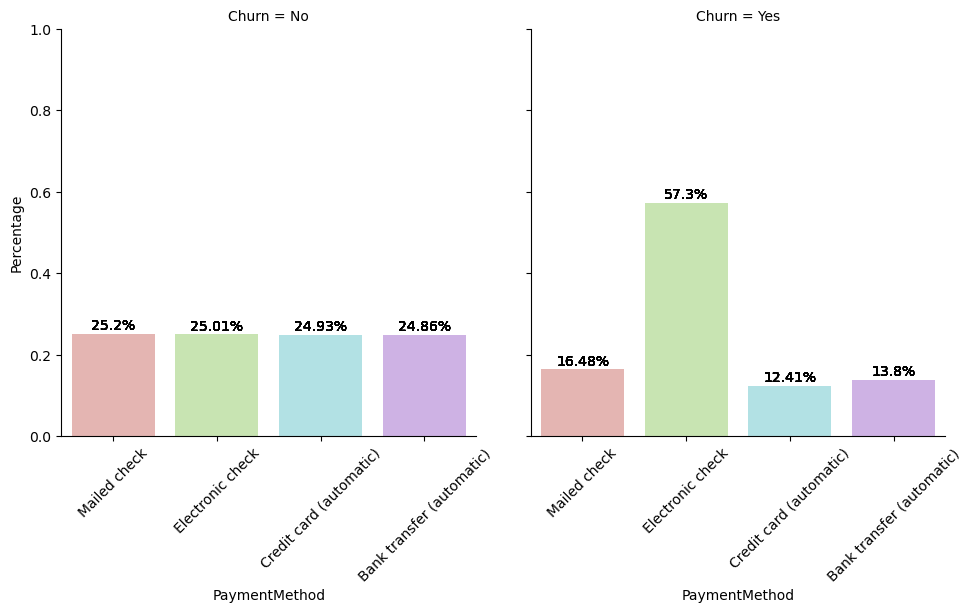

In [65]:
categorical_vs_churn_dist('PaymentMethod')

* Customers using electronic check are more likely to churn.

## Numerical Distribution Graph

### Distribution of Tenure with respect to Churn

In [210]:
def numerical_distribution(feature):
    fig=plt.figure(figsize=(15,10))
    plt.subplot(2,1,1)
    ax=sns.kdeplot(df[feature],fill=True,label='Tenure')
    plt.title(feature +" Distribution")

    plt.subplot(2,1,2)
    ax=sns.kdeplot(df.loc[(df["Churn"]=="Yes"),feature],label="Churn",color='g',fill=True)
    ax=sns.kdeplot(df.loc[(df['Churn']=="No") ,feature],label="No Churn",color='b',fill=True,alpha=0.1)  
    plt.title(feature +" Distribution: Churn vs No Churn")
    
    plt.legend()
    plt.show()

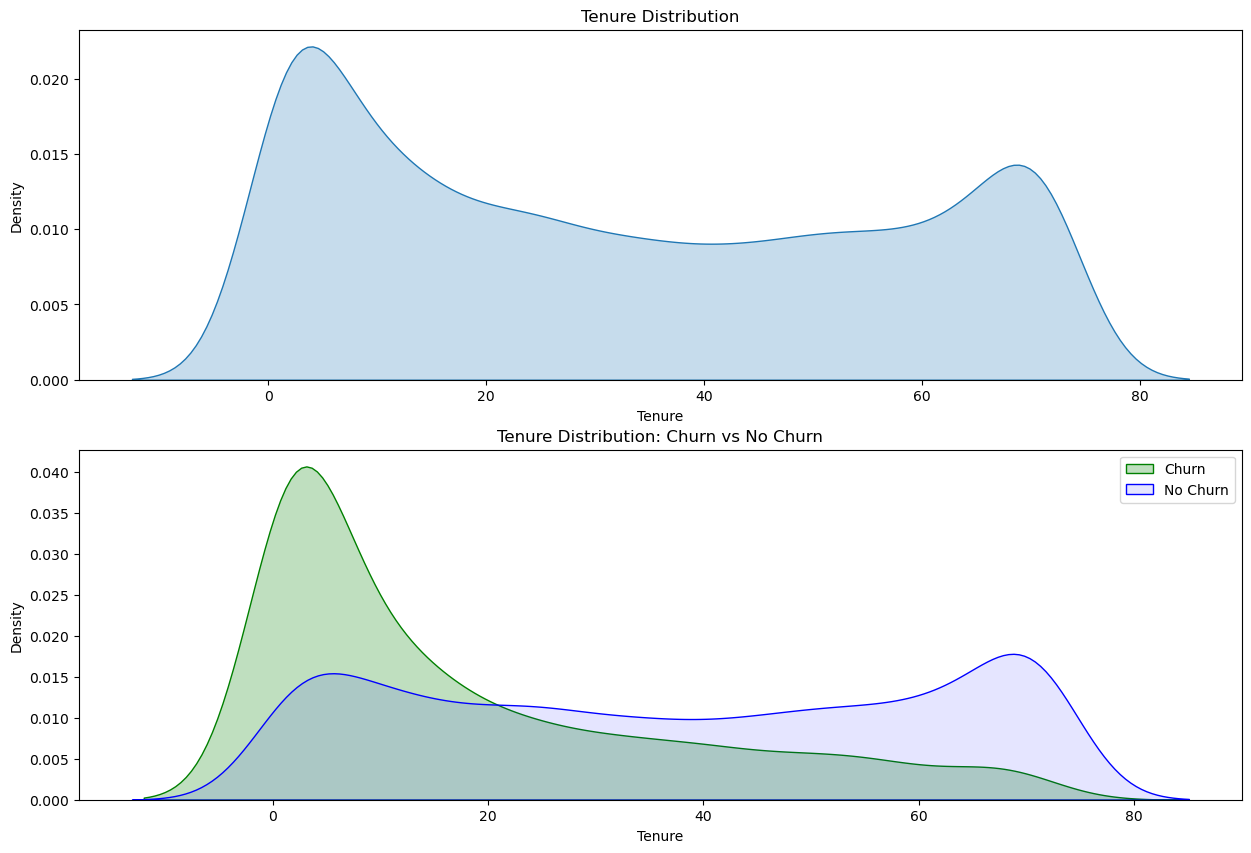

In [212]:
numerical_distribution('Tenure')

* Customers who has churned are more likely to have tenure around year.

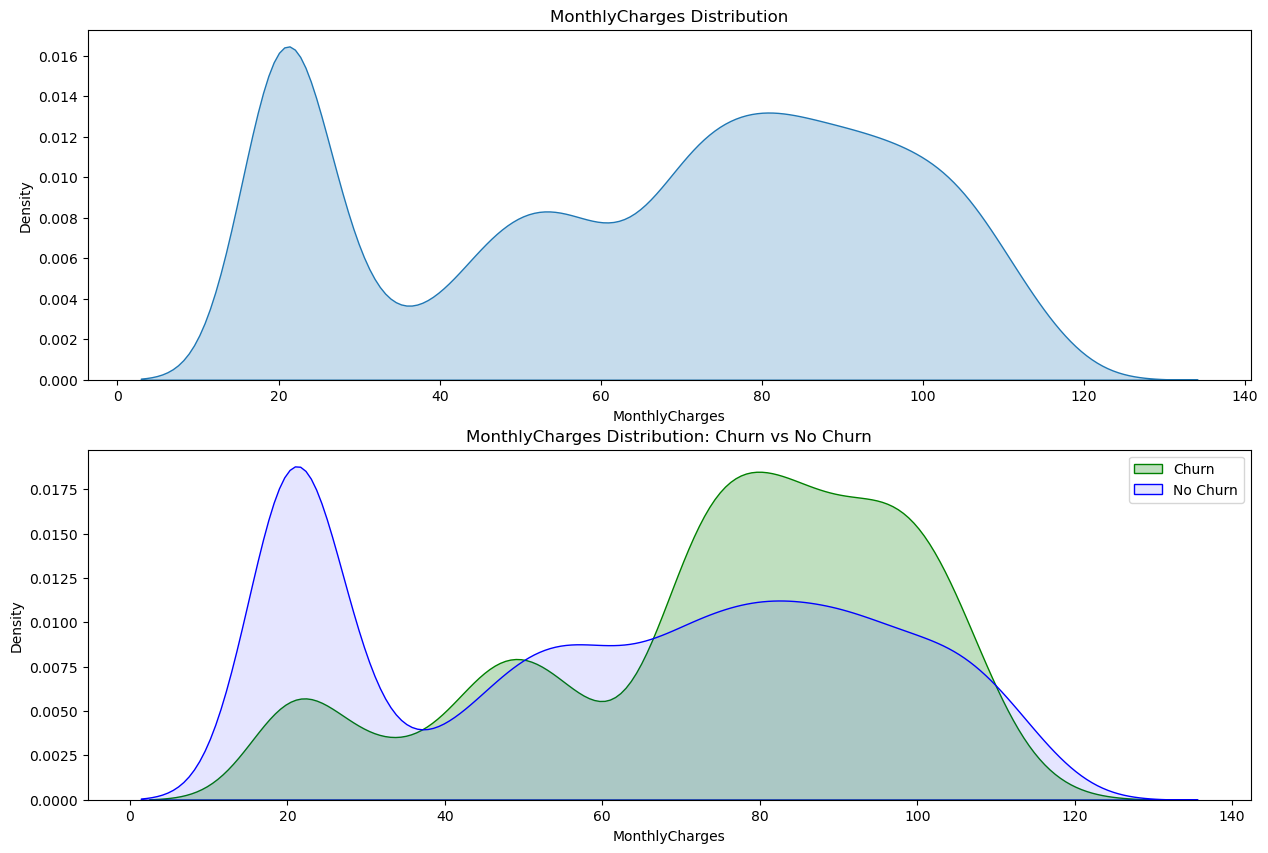

In [215]:
numerical_distribution('MonthlyCharges')

* Customers who has churned have monthly charges around 80-100 USD.

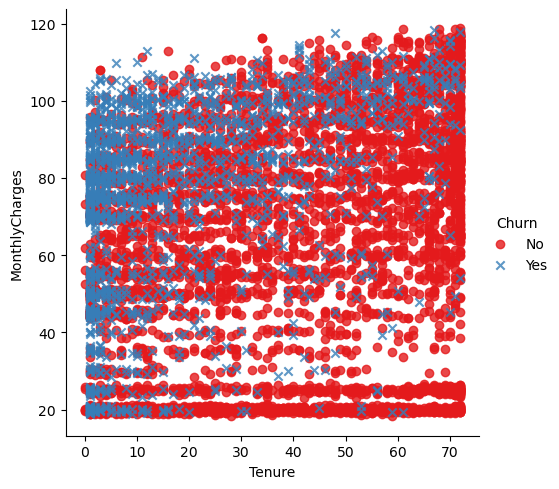

In [219]:
sns.lmplot(x='Tenure',y='MonthlyCharges',data=df
               ,hue='Churn'
               ,fit_reg=False
               ,markers=["o", "x"]
               ,palette="Set1"
          )
plt.show() 

## K Means Clustering

## Encoding and Scaling

## Model Building

In [ ]:
# trial 1